
#**HILL AND VALLEY PREDICTION BY USING LOGESTIC REGRESSION**





# **Objective :**
### The objective of using a logistic regression model to predict hill and valley regions is to classify and distinguish geographical terrain into two categories: hill regions and valley regions. This classification can be valuable in various applications, including environmental studies, urban planning, agriculture, and outdoor activities.




# **Data Source :**
### This dataset was taken from the github library which is maintained at YBI Foundation. Each record represents 100 points on a two dimensional graph. When plotted in order (from 1 through 100) as the Y coordinate, the point will create either a Hill (a "bump" in the terrain) or a Valley (a "Dip" in the terrain).





# **Import Library :**


In [6]:
import pandas as pd

In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt



#**Import Data :**

In [9]:
df=pd.read_csv('/content/Hill Valley Dataset.csv')

# **Describe Data :**

In [10]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0


In [11]:
df.nunique()

,0
V1,1170
V2,1170
V3,1175
V4,1167
V5,1174
...,...
V97,1170
V98,1179
V99,1163
V100,1175


# **Data Visualization :**

In [12]:
x = df.drop('Class', axis = 1)

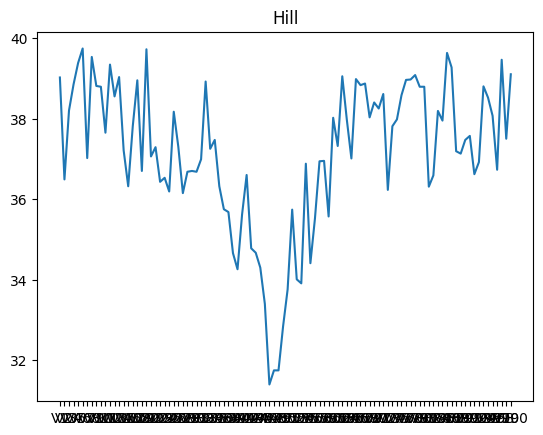

In [13]:
plt.plot(x.iloc[0,:])
plt.title('Hill');

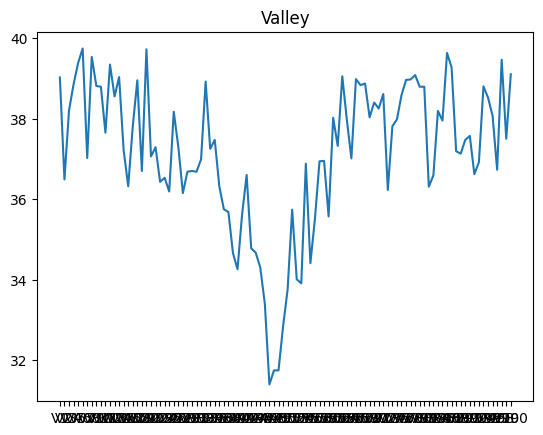

In [14]:
plt.plot(x.iloc[0,:])
plt.title('Valley');

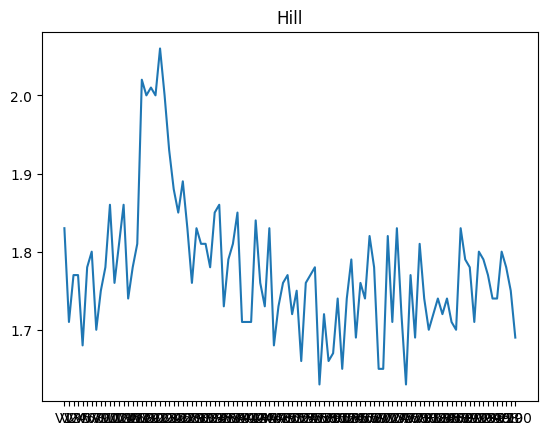

In [15]:
plt.plot(x.iloc[1,:])
plt.title('Hill');

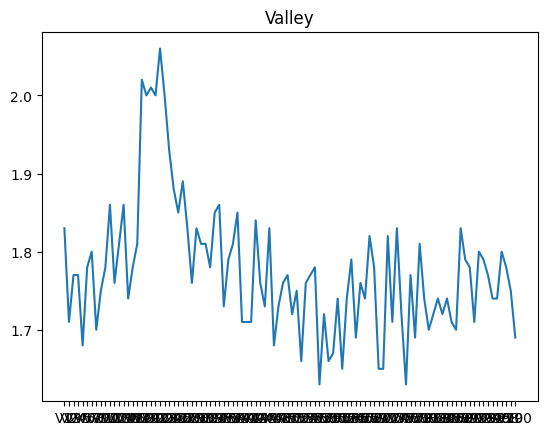

In [16]:
plt.plot(x.iloc[1,:])
plt.title('Valley');

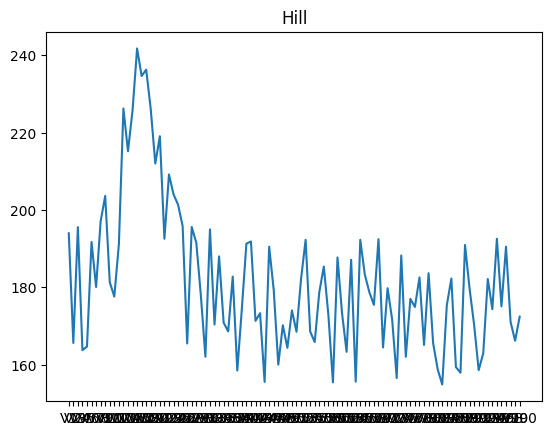

In [17]:
plt.plot(x.iloc[10,:])
plt.title('Hill');

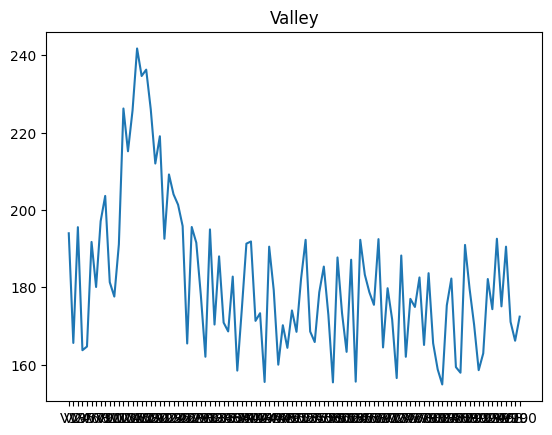

In [18]:
plt.plot(x.iloc[10,:])
plt.title('Valley');


# **Data Preprocessing :**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Columns: 101 entries, V1 to Class
dtypes: float64(100), int64(1)
memory usage: 956.5 KB


In [20]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,8169.091881,8144.306262,8192.653738,8176.868738,8128.297211,8173.030008,8188.582748,8183.641543,8154.670066,8120.767574,...,8120.056815,8125.917409,8158.793812,8140.885421,8213.480611,8185.594002,8140.195355,8192.960891,8156.197376,0.500000
std,17974.950461,17881.049734,18087.938901,17991.903982,17846.757963,17927.114105,18029.562695,18048.582159,17982.390713,17900.798206,...,17773.190621,17758.182403,17919.510371,17817.945646,18016.445265,17956.084223,17768.356106,18064.781479,17829.310973,0.500206
min,0.920000,0.900000,0.850000,0.890000,0.880000,0.860000,0.870000,0.650000,0.650000,0.620000,...,0.870000,0.900000,0.870000,0.880000,0.890000,0.890000,0.860000,0.910000,0.890000,0.000000
25%,19.602500,19.595000,18.925000,19.277500,19.210000,19.582500,18.690000,19.062500,19.532500,19.285000,...,19.197500,18.895000,19.237500,19.385000,19.027500,19.135000,19.205000,18.812500,19.145000,0.000000
50%,301.425000,295.205000,297.260000,299.720000,295.115000,294.380000,295.935000,290.850000,294.565000,295.160000,...,297.845000,295.420000,299.155000,293.355000,301.370000,296.960000,300.925000,299.200000,302.275000,0.500000
75%,5358.795000,5417.847500,5393.367500,5388.482500,5321.987500,5328.040000,5443.977500,5283.655000,5378.180000,5319.097500,...,5355.355000,5386.037500,5286.385000,5345.797500,5300.890000,5361.047500,5390.850000,5288.712500,5357.847500,1.000000
max,117807.870000,108896.480000,119031.350000,110212.590000,113000.470000,116848.390000,115609.240000,118522.320000,112895.900000,117798.300000,...,113858.680000,112948.830000,112409.570000,112933.730000,112037.220000,115110.420000,116431.960000,113291.960000,114533.760000,1.000000


In [21]:
df.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
V1,1.000000,0.997913,0.997474,0.996836,0.997504,0.997031,0.996955,0.995641,0.996585,0.996782,...,0.995848,0.997085,0.996515,0.997221,0.997464,0.996920,0.997579,0.997179,0.997160,0.014234
V2,0.997913,1.000000,0.997282,0.997968,0.997898,0.997695,0.997092,0.997003,0.997311,0.996964,...,0.996892,0.997146,0.996844,0.997279,0.997485,0.997392,0.997017,0.998146,0.996831,0.017846
V3,0.997474,0.997282,1.000000,0.997536,0.997006,0.997304,0.997769,0.996809,0.997386,0.996500,...,0.995675,0.996678,0.996689,0.996802,0.997871,0.997464,0.998029,0.997380,0.996828,0.016048
V4,0.996836,0.997968,0.997536,1.000000,0.996323,0.997301,0.997757,0.996785,0.996948,0.995435,...,0.996158,0.996328,0.996771,0.996147,0.996612,0.996875,0.996848,0.996653,0.996474,0.017784
V5,0.997504,0.997898,0.997006,0.996323,1.000000,0.997544,0.997193,0.997124,0.997369,0.996842,...,0.996095,0.997151,0.996606,0.996737,0.997191,0.997541,0.996853,0.997107,0.996717,0.019770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V97,0.996920,0.997392,0.997464,0.996875,0.997541,0.997264,0.997192,0.996062,0.996727,0.995315,...,0.995558,0.996625,0.996737,0.996810,0.997471,1.000000,0.997863,0.996998,0.996464,0.017332
V98,0.997579,0.997017,0.998029,0.996848,0.996853,0.996668,0.996777,0.995617,0.996673,0.996167,...,0.995520,0.996693,0.995911,0.996857,0.997564,0.997863,1.000000,0.996739,0.997016,0.016664
V99,0.997179,0.998146,0.997380,0.996653,0.997107,0.997119,0.996227,0.996472,0.996865,0.996830,...,0.996641,0.997070,0.996579,0.997334,0.997802,0.996998,0.996739,1.000000,0.996804,0.017590
V100,0.997160,0.996831,0.996828,0.996474,0.996717,0.996060,0.996095,0.994905,0.996150,0.994800,...,0.996729,0.997585,0.997237,0.997309,0.997293,0.996464,0.997016,0.996804,1.000000,0.016890


In [22]:
df = df.dropna()

# **Defining Feature Variables (X) And Target Variable (Y) :**

In [25]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100',
       'Class'],
      dtype='object', length=101)

In [32]:
x = df.drop('Class', axis = 1)

In [33]:
x.shape

(1212, 100)

In [34]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,37.57,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.71,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,69384.71,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,47653.60,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.52,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,13.00,12.87,13.27,13.04,13.19,12.53,14.31,13.33,13.63,14.55,...,12.89,12.48,12.15,13.15,12.35,13.58,13.86,12.88,13.87,13.51
1208,48.66,50.11,48.55,50.43,50.09,49.67,48.95,48.65,48.63,48.61,...,47.45,46.93,49.61,47.16,48.17,47.94,49.81,49.89,47.43,47.77
1209,10160.65,9048.63,8994.94,9514.39,9814.74,10195.24,10031.47,10202.28,9152.99,9591.75,...,10413.41,9068.11,9191.80,9275.04,9848.18,9074.17,9601.74,10366.24,8997.60,9305.77
1210,34.81,35.07,34.98,32.37,34.16,34.03,33.31,32.48,35.63,32.48,...,33.18,32.76,35.03,32.89,31.91,33.85,35.28,32.49,32.83,34.82


In [35]:
y = df['Class']

In [36]:
y.shape

(1212,)

In [37]:
y

,Class
0,0
1,1
2,1
3,0
4,0
...,...
1207,1
1208,0
1209,1
1210,1


# **Train Test Split :**


### Scaling Data

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
ss = StandardScaler()

In [40]:
x = ss.fit_transform(x)

In [41]:
x

array([[-0.45248681, -0.45361784, -0.45100881, ..., -0.45609618,
        -0.45164274, -0.45545496],
       [-0.45455665, -0.45556372, -0.45302369, ..., -0.45821768,
        -0.45362255, -0.45755405],
       [ 3.33983504,  3.24466709,  3.58338069, ...,  3.5427869 ,
         3.27907378,  3.74616847],
       ...,
       [ 0.11084204,  0.0505953 ,  0.04437307, ...,  0.12533312,
         0.04456025,  0.06450317],
       [-0.45272112, -0.45369729, -0.45118691, ..., -0.45648861,
        -0.45190136, -0.45569511],
       [ 0.01782872, -0.02636986,  0.05196137, ...,  0.03036056,
         0.01087365,  0.03123129]])

In [42]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,...,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03
mean,2.015256e-17,2.564872e-17,-3.077846e-17,4.030513e-18,7.035077e-17,-3.590820e-17,6.119051e-17,-2.088538e-17,-5.276307e-17,6.595384e-17,...,-4.396923e-17,-8.061025e-17,6.082410e-17,-3.444256e-17,-2.345026e-17,-4.396923e-17,2.308385e-17,2.931282e-18,-2.638154e-17,6.045769e-17
std,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,...,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00
min,-4.546073e-01,-4.556090e-01,-4.530746e-01,-4.546130e-01,-4.555882e-01,-4.560435e-01,-4.543145e-01,-4.535741e-01,-4.536319e-01,-4.538066e-01,...,-4.589416e-01,-4.570107e-01,-4.577254e-01,-4.554417e-01,-4.570317e-01,-4.560267e-01,-4.560060e-01,-4.582695e-01,-4.536691e-01,-4.575989e-01
25%,-4.535675e-01,-4.545631e-01,-4.520749e-01,-4.535906e-01,-4.545607e-01,-4.549987e-01,-4.533258e-01,-4.525535e-01,-4.525814e-01,-4.527634e-01,...,-4.578983e-01,-4.559791e-01,-4.567117e-01,-4.544162e-01,-4.559927e-01,-4.550196e-01,-4.549895e-01,-4.572366e-01,-4.526776e-01,-4.565746e-01
50%,-4.378824e-01,-4.391432e-01,-4.366807e-01,-4.379970e-01,-4.390946e-01,-4.396638e-01,-4.379422e-01,-4.374886e-01,-4.372805e-01,-4.373457e-01,...,-4.422561e-01,-4.402947e-01,-4.411335e-01,-4.387890e-01,-4.406103e-01,-4.393418e-01,-4.395107e-01,-4.413749e-01,-4.371500e-01,-4.406881e-01
75%,-1.564097e-01,-1.525405e-01,-1.548237e-01,-1.550440e-01,-1.573097e-01,-1.587631e-01,-1.522909e-01,-1.607430e-01,-1.544642e-01,-1.565755e-01,...,-1.566543e-01,-1.556188e-01,-1.543520e-01,-1.603612e-01,-1.569340e-01,-1.617296e-01,-1.573680e-01,-1.547966e-01,-1.608349e-01,-1.570170e-01
max,6.102049e+00,5.636904e+00,6.130298e+00,5.673543e+00,5.878685e+00,6.064569e+00,5.960488e+00,6.115950e+00,5.827060e+00,6.129492e+00,...,5.770964e+00,5.951789e+00,5.905232e+00,5.820126e+00,5.883737e+00,5.765099e+00,5.957255e+00,6.097158e+00,5.820296e+00,5.968906e+00


### After Standardization Mean is Zero and Standard Deviation is One



In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state= 2529)

In [45]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((848, 100), (364, 100), (848,), (364,))

#  **Modeling :**

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model = LogisticRegression()

In [48]:
model.fit (x_train, y_train)

LogisticRegression()

# **Model Evaluation :**

In [49]:
model.intercept_

array([0.01567547])

In [50]:
model.coef_

array([[-2.00635409, -1.5540176 , -1.59776918, -1.48640045, -1.55140196,
        -1.28610793, -0.70409266, -0.50801907, -0.66265866, -0.03342069,
         0.4288463 ,  0.32574926,  0.6604972 ,  0.50333049,  1.14142437,
         0.64819077,  0.28860478,  0.49169142,  0.35953305,  0.33887157,
         0.16583076, -0.23555632,  0.23691954,  0.27028794,  0.16170858,
         0.54092832,  0.35835158,  0.34864755,  0.3042187 ,  0.08954404,
         0.49313278,  0.247412  ,  0.6235504 ,  0.1645637 ,  0.19373986,
         0.43446033,  0.42733179, -0.09170918,  0.46094204, -0.02220414,
         0.55890721,  0.52896478,  0.42264504,  0.40129983,  0.26085818,
         0.42830712,  0.28856785, -0.02921963,  0.11542879,  0.50103418,
         0.16426892,  0.19830072,  0.32716539,  0.24182972,  0.44082887,
         0.52742334,  0.10129758,  0.13815965,  0.02411193,  0.42154899,
         0.08097992,  0.28362746,  0.48926523,  0.08384902,  0.3797198 ,
         0.27236911,  0.26463978, -0.55904224, -0.2

# **Prediction :**

In [51]:
y_pred = model.predict(x_test)

In [52]:
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

# **Model Accuracy :**

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [54]:
print(confusion_matrix(y_test,y_pred))

[[176   4]
 [ 92  92]]


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.98      0.79       180
           1       0.96      0.50      0.66       184

    accuracy                           0.74       364
   macro avg       0.81      0.74      0.72       364
weighted avg       0.81      0.74      0.72       364



In [56]:
accuracy_score(y_test,y_pred)

0.7362637362637363

# **Explanation :**


### 1. Accuracy in Machine Leaning Model is used for Classification, Number of correct predictions

###2. It is the ratio of number of correct predictions to the total number of predictions

###3. In machine learning model accuracy score above 0.73 is treated as good-to-go-model

###4. Therefore Machine learning Model is 73% accurate in correct predictions